In [87]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Training Image Preprocessing 

In [88]:
 training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 140577 files belonging to 38 classes.


### Validation Image Preprocessing

In [89]:
 validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",   
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 35144 files belonging to 38 classes.


In [90]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [91]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)     # At a time 32 images are feeding to neural network
    break

tf.Tensor(
[[[[179.5  168.5  174.5 ]
   [175.5  164.5  170.5 ]
   [158.75 147.75 153.75]
   ...
   [143.   132.   138.  ]
   [141.75 130.75 136.75]
   [152.25 141.25 147.25]]

  [[167.25 156.25 162.25]
   [160.75 149.75 155.75]
   [166.   155.   161.  ]
   ...
   [152.   141.   147.  ]
   [150.   139.   145.  ]
   [152.   141.   147.  ]]

  [[169.75 158.75 164.75]
   [173.75 162.75 168.75]
   [164.   153.   159.  ]
   ...
   [156.5  145.5  151.5 ]
   [162.75 151.75 157.75]
   [150.75 139.75 145.75]]

  ...

  [[196.25 191.25 198.25]
   [194.25 189.25 196.25]
   [192.   187.   194.  ]
   ...
   [164.   154.   163.  ]
   [162.   152.   161.  ]
   [164.   154.   163.  ]]

  [[188.25 183.25 190.25]
   [189.   184.   191.  ]
   [189.75 184.75 191.75]
   ...
   [159.5  149.5  158.5 ]
   [163.25 153.25 162.25]
   [164.75 154.75 163.75]]

  [[188.75 183.75 190.75]
   [189.75 184.75 191.75]
   [191.   186.   193.  ]
   ...
   [159.   149.   158.  ]
   [164.75 154.75 163.75]
   [165.   155.   16

### Building Model


In [92]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [93]:
model = Sequential()

### Buliding Convolutional Layer

In [94]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [95]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [96]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [97]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [98]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [99]:
model.add(Dropout(0.25))

In [100]:
model.add(Flatten())

In [101]:
model.add(Dense(units=1500,activation='relu'))

In [102]:
model.add(Dropout(0.4))

### Output Layer

In [103]:
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [104]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']) 

In [105]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [106]:
training_history = model.fit(x=training_set ,validation_data=validation_set,epochs=10)

Epoch 1/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 2150s 489ms/step - accuracy: 0.5587 - loss: 1.5382 - val_accuracy: 0.8813 - val_loss: 0.3689
Epoch 2/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1891s 430ms/step - accuracy: 0.9134 - loss: 0.2685 - val_accuracy: 0.9439 - val_loss: 0.1758
Epoch 3/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1801s 410ms/step - accuracy: 0.9546 - loss: 0.1383 - val_accuracy: 0.9505 - val_loss: 0.1628
Epoch 4/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1797s 409ms/step - accuracy: 0.9709 - loss: 0.0882 - val_accuracy: 0.9670 - val_loss: 0.1053
Epoch 5/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1797s 409ms/step - accuracy: 0.9803 - loss: 0.0619 - val_accuracy: 0.9507 - val_loss: 0.1697
Epoch 6/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1798s 409ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9697 - val_loss: 0.1117
Epoch 7/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1795s 409ms/step - accuracy: 0.9857 - loss: 0.0459 - val_accuracy: 0.9636 - val_loss: 0.1377
Epoch 8/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1795s 409ms/s

### Model Evaluation

In [107]:
train_loss,train_acc = model.evaluate(training_set)

4394/4394 ━━━━━━━━━━━━━━━━━━━━ 549s 125ms/step - accuracy: 0.9957 - loss: 0.0162


In [108]:
print(train_loss,train_acc)

0.016075389459729195 0.9959452748298645


In [109]:
### MODEL ON VALIDATION SET

In [110]:
val_loss,val_acc = model.evaluate(validation_set)

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 137s 124ms/step - accuracy: 0.9726 - loss: 0.1113


### Saving Model

In [112]:
model.save("trained_model.keras")

In [113]:
training_history.history

{'accuracy': [0.7437987923622131,
  0.9280465245246887,
  0.9601286053657532,
  0.9742916822433472,
  0.981476366519928,
  0.9849548935890198,
  0.9870604872703552,
  0.9892941117286682,
  0.9905603528022766,
  0.9912859201431274],
 'loss': [0.8531855940818787,
  0.222243532538414,
  0.12158624827861786,
  0.07888209819793701,
  0.0580073818564415,
  0.047116827219724655,
  0.04094257950782776,
  0.0339619405567646,
  0.030228331685066223,
  0.027458347380161285],
 'val_accuracy': [0.8813453316688538,
  0.9439449310302734,
  0.9504894018173218,
  0.9669929146766663,
  0.950717031955719,
  0.9697245359420776,
  0.9635784029960632,
  0.9695538282394409,
  0.9773503541946411,
  0.9739927053451538],
 'val_loss': [0.36887267231941223,
  0.1757730394601822,
  0.16277086734771729,
  0.10527771711349487,
  0.16974900662899017,
  0.11167296022176743,
  0.13765662908554077,
  0.11109665036201477,
  0.09042030572891235,
  0.10445083677768707]}

###  Recording History in json

In [114]:
import json
with open("tarining_hist.json","w")as f:
    json.dump(training_history.history,f)

In [118]:
 training_history.history['accuracy']

[0.7437987923622131,
 0.9280465245246887,
 0.9601286053657532,
 0.9742916822433472,
 0.981476366519928,
 0.9849548935890198,
 0.9870604872703552,
 0.9892941117286682,
 0.9905603528022766,
 0.9912859201431274]

### Accuracy Visulaization

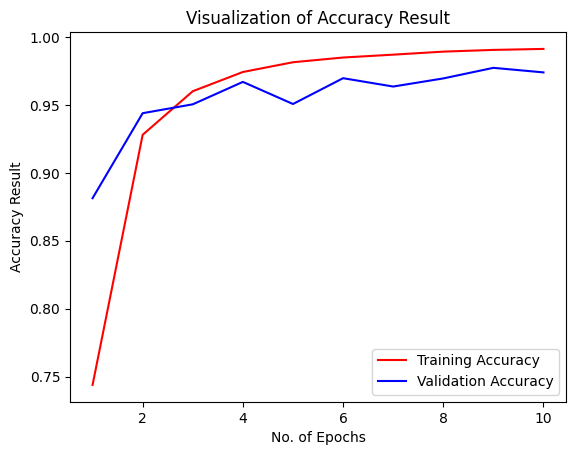

In [123]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [127]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [128]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",   
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 35144 files belonging to 38 classes.


In [130]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 122s 111ms/step


(array([[9.9999976e-01, 1.3723164e-10, 4.6725527e-12, ..., 3.0943086e-18,
         1.4447530e-16, 1.4561303e-14],
        [9.9999976e-01, 1.3723164e-10, 4.6725527e-12, ..., 3.0943086e-18,
         1.4447530e-16, 1.4561303e-14],
        [1.0000000e+00, 9.6863184e-10, 3.2564975e-12, ..., 2.2407716e-22,
         2.7755283e-20, 2.6115312e-18],
        ...,
        [2.3265606e-15, 4.4010223e-18, 4.2692903e-13, ..., 2.8435333e-16,
         4.5557900e-16, 1.0000000e+00],
        [3.1099534e-18, 5.7288930e-21, 8.9313462e-16, ..., 6.9924848e-22,
         4.7809602e-20, 1.0000000e+00],
        [3.1099534e-18, 5.7288930e-21, 8.9313462e-16, ..., 6.9924848e-22,
         4.7809602e-20, 1.0000000e+00]], dtype=float32),
 (35144, 38))

In [131]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [132]:
predicted_categories

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [133]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(35144, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [141]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [150]:
from sklearn.metrics import classification_report,confusion_matrix

In [151]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.98      0.98      1008
                                 Apple___Black_rot       1.00      0.99      0.99       994
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       880
                                   Apple___healthy       0.94      0.99      0.96      1004
                               Blueberry___healthy       0.98      0.98      0.98       908
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       842
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       912
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.96      0.93       820
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       954
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.94      0.

In [155]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[984,   0,   0, ...,   0,   0,   0],
       [  0, 986,   2, ...,   0,   0,   0],
       [  0,   0, 864, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ..., 970,   0,   0],
       [  0,   0,   0, ...,   0, 872,   0],
       [  0,   0,   0, ...,   0,   0, 960]], dtype=int64)

### Confusion matrix visualization

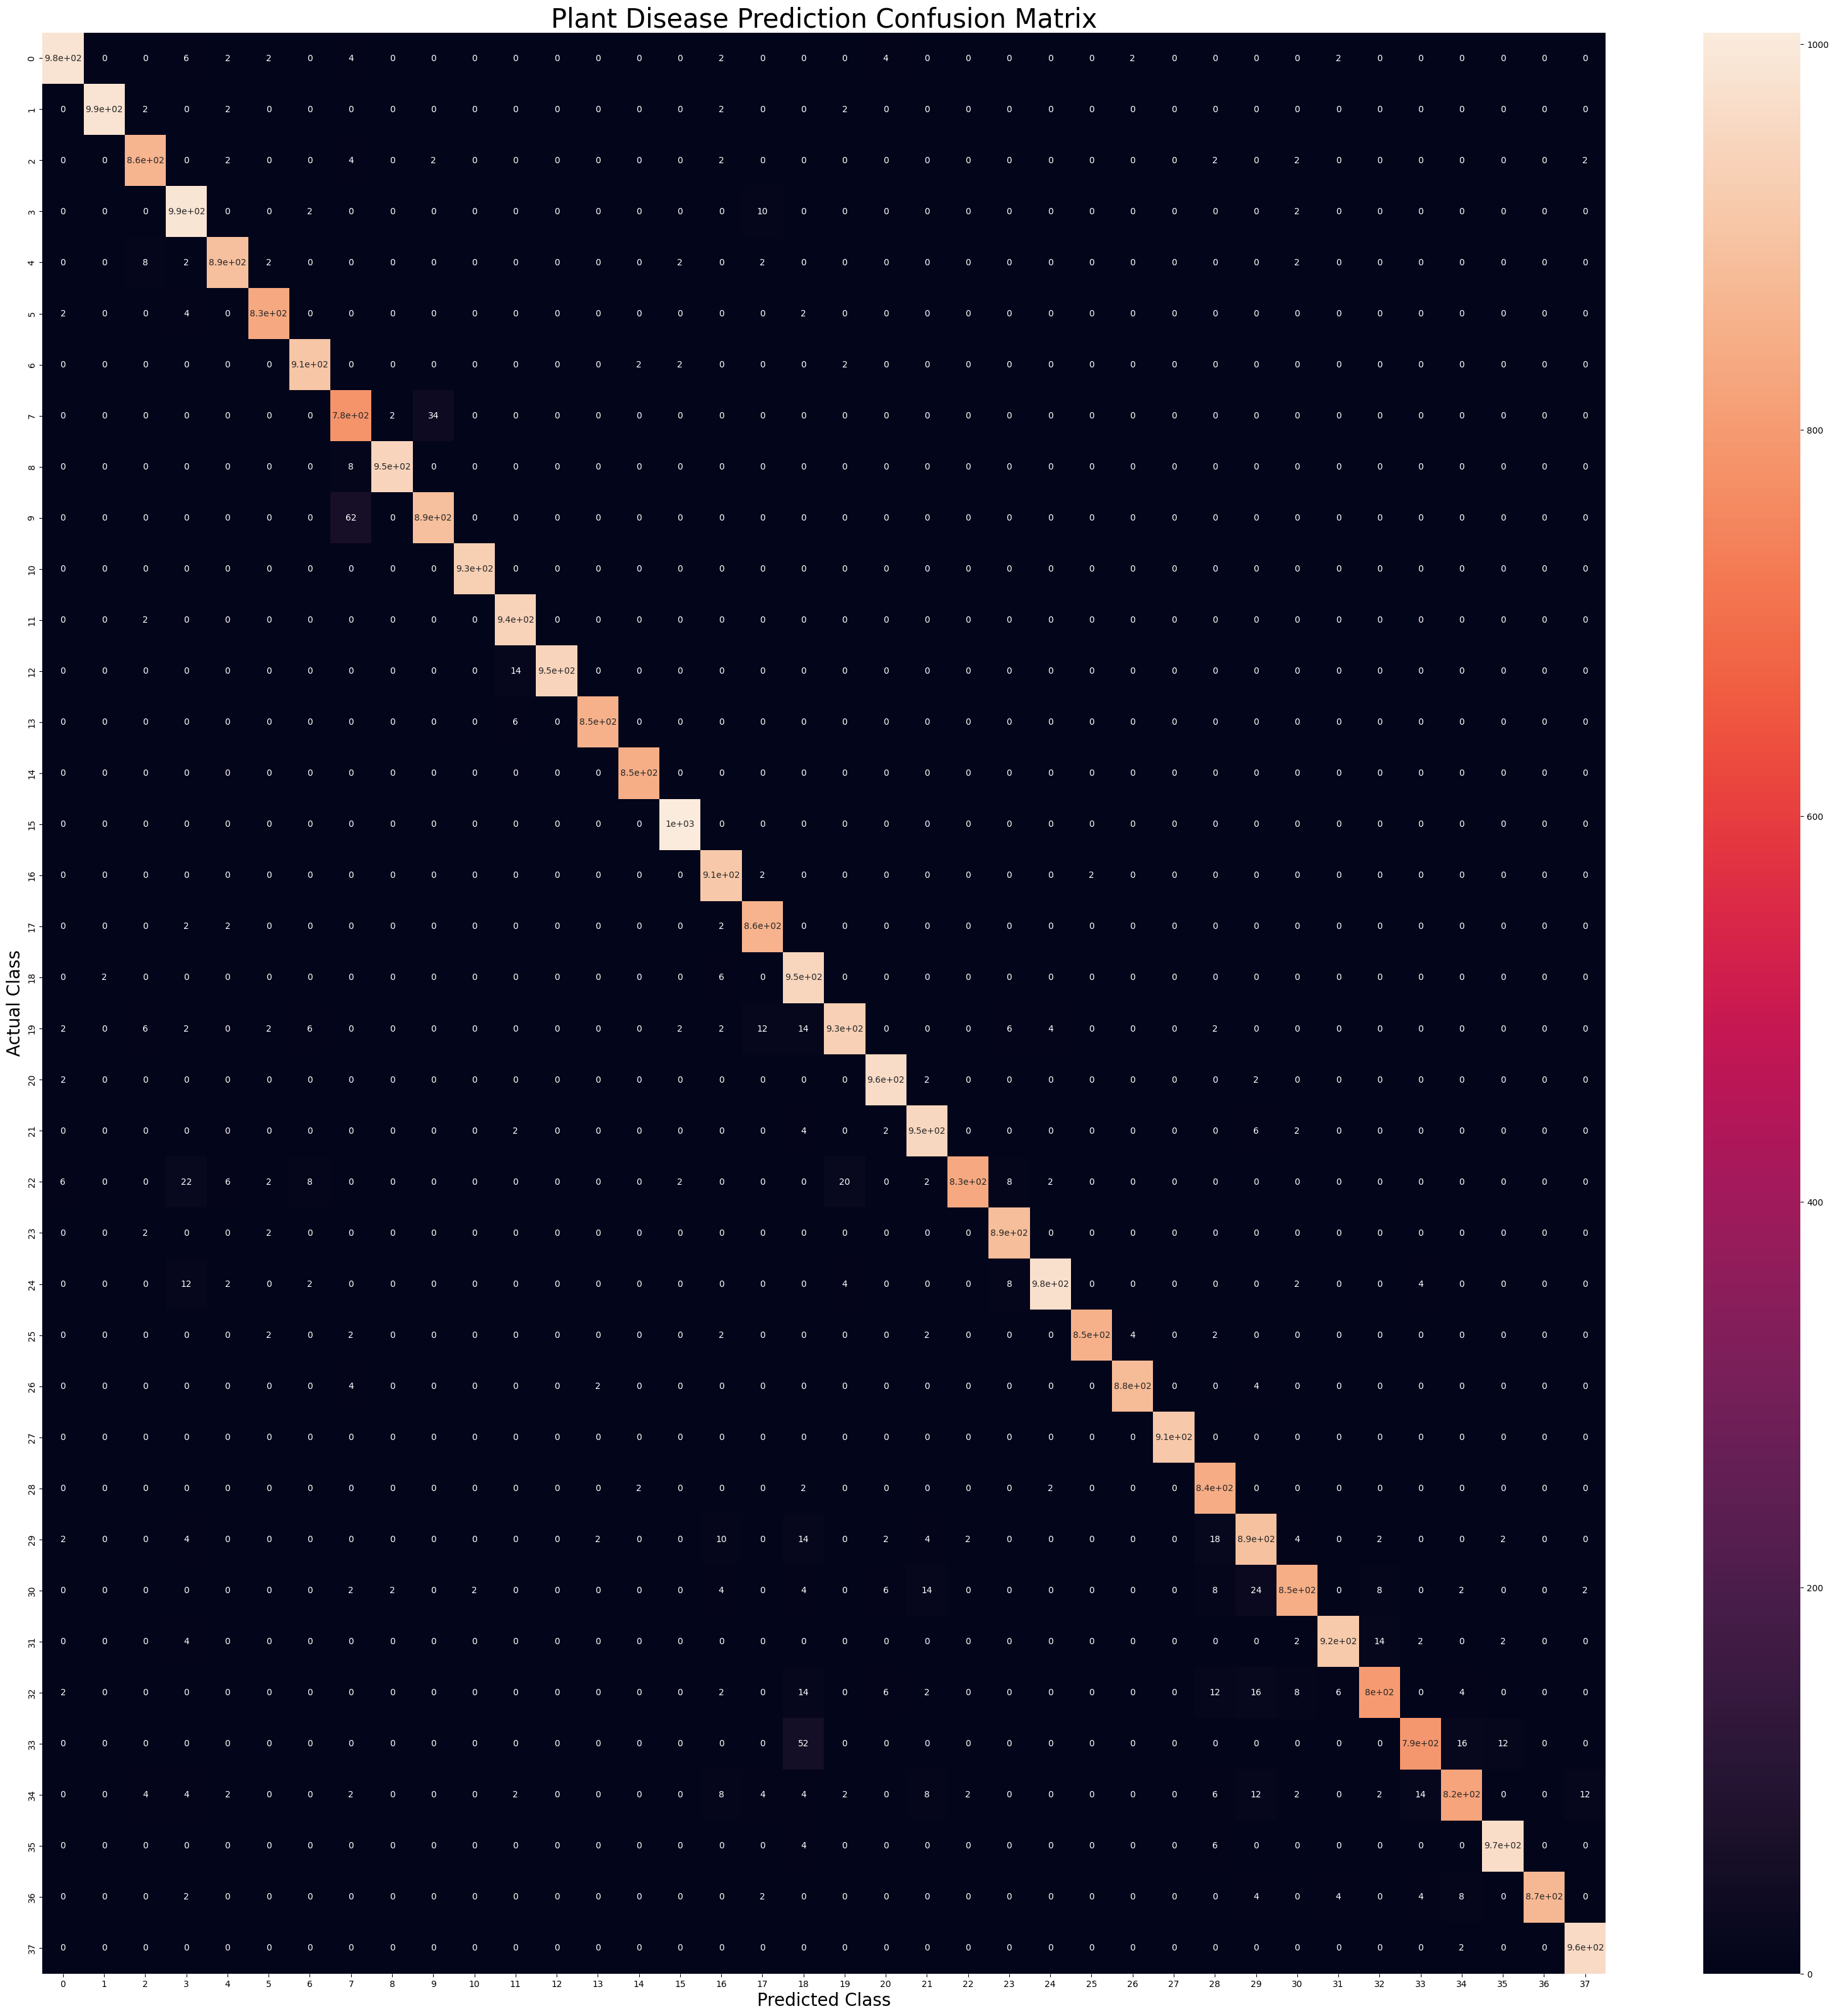

In [162]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()